In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### 

In [2]:
churn = pd.read_csv(r"C:\Users\kirti\OneDrive\Desktop\Python Excel files\customer_churn-1\customer_churn.csv")

In [3]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn.shape

(7043, 21)

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')

In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
churn.dropna(inplace = True)

In [10]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
churn.duplicated().sum()

0

In [12]:
#Checking the descriptives statistics of numeric variables
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [31]:
for col in churn:
    print(f'{col}:{churn[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   

In [35]:
def unique_col_values(churn):
    for col in churn:
        if churn[col].dtypes=='object':
         print(f'{col}:{churn[col].unique()}')

In [36]:
 unique_col_values(churn)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [37]:
churn.replace('No phone service', 'No', inplace = True)
churn.replace('No internet service', 'No', inplace = True)

In [38]:
 unique_col_values(churn)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


## Univariate Analysis

Text(0.5, 1.0, 'Barplot:Churn Distribution')

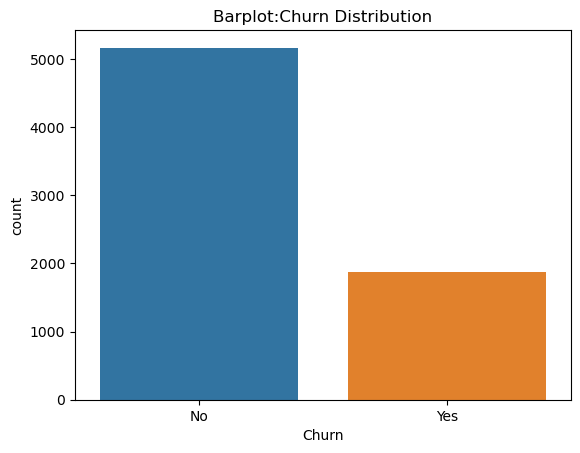

In [13]:
sns.countplot(data = churn, x= 'Churn')
plt.title('Barplot:Churn Distribution')

In [14]:
churn['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [15]:
churn['Churn'].value_counts()/len(churn['Churn'])*100

Churn
No     73.421502
Yes    26.578498
Name: count, dtype: float64

In [16]:
churn.drop('customerID', inplace = True, axis = 1)

In [17]:
excluded_variables = churn[['Churn', 'TotalCharges', 'MonthlyCharges']]

In [18]:
excluded_variables

,Churn,TotalCharges,MonthlyCharges
0,No,29.85,29.85
1,No,1889.50,56.95
2,Yes,108.15,53.85
3,No,1840.75,42.30
4,Yes,151.65,70.70
...,...,...,...
7038,No,1990.50,84.80
7039,No,7362.90,103.20
7040,No,346.45,29.60
7041,Yes,306.60,74.40


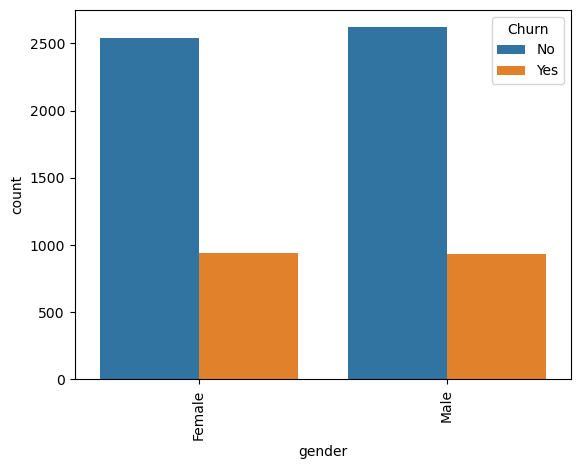

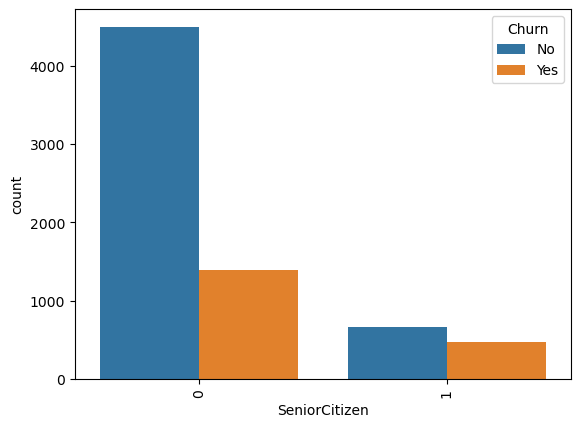

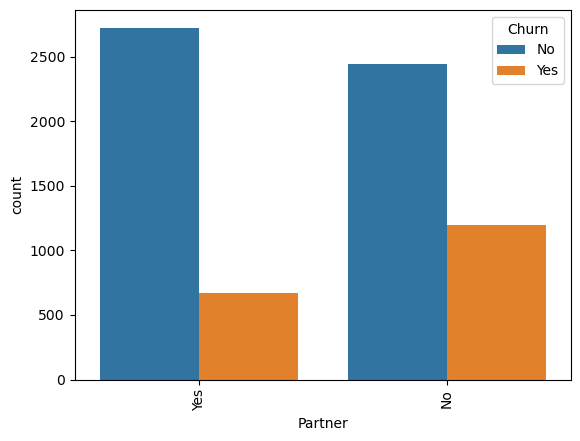

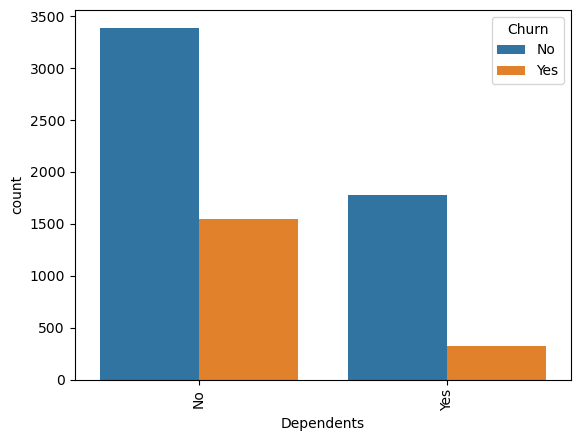

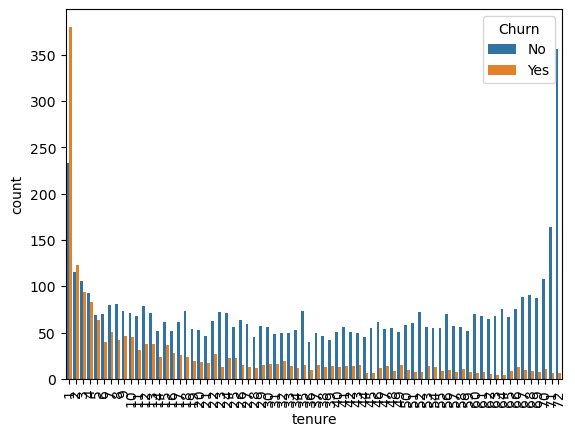

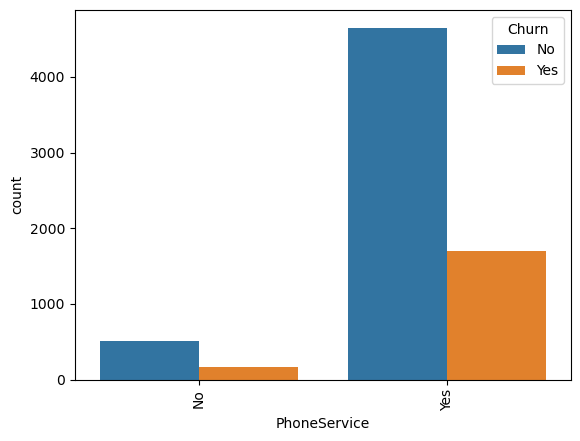

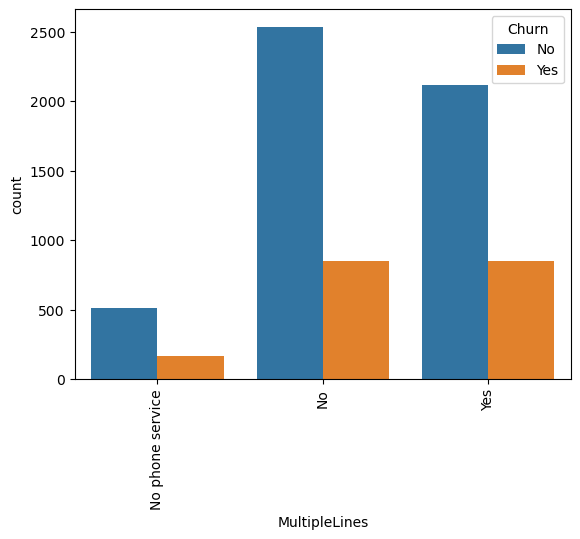

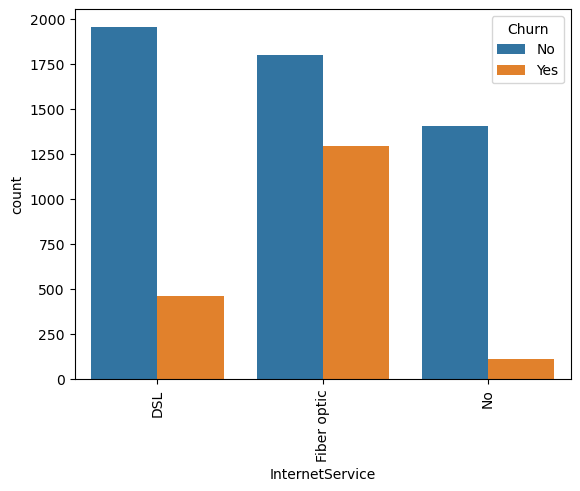

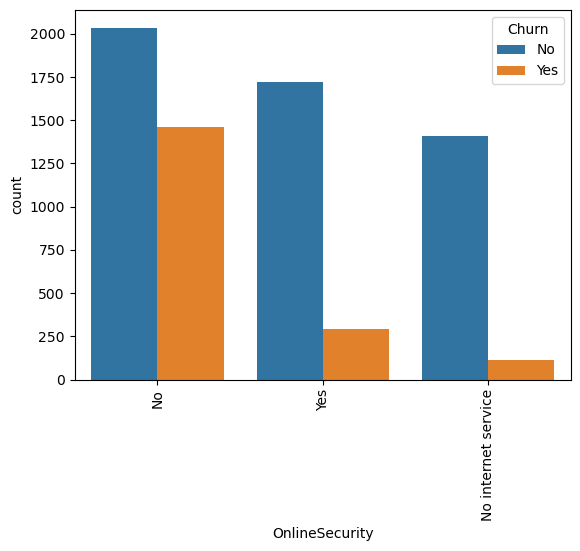

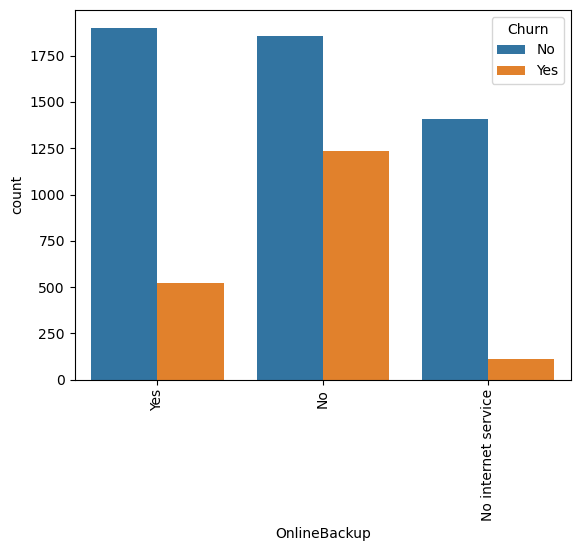

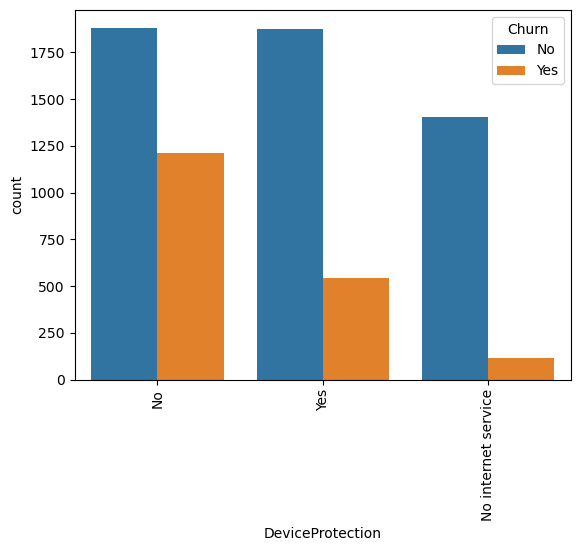

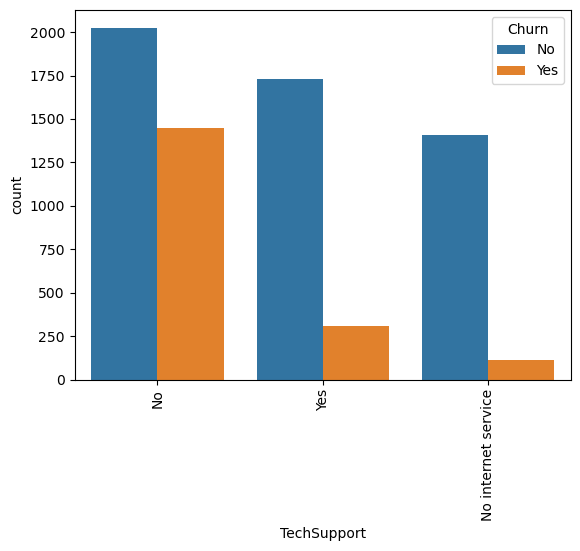

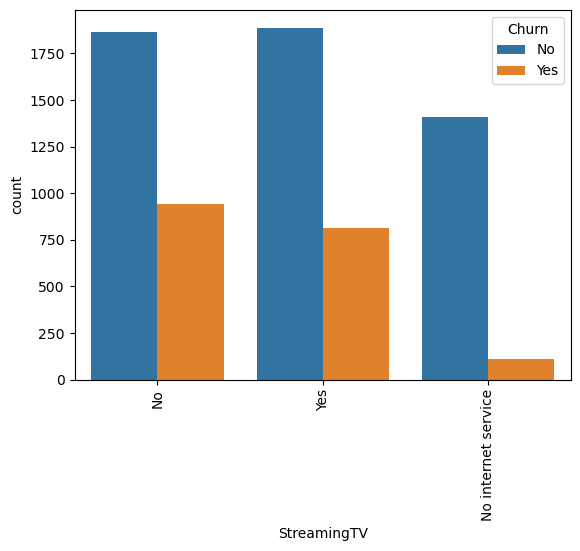

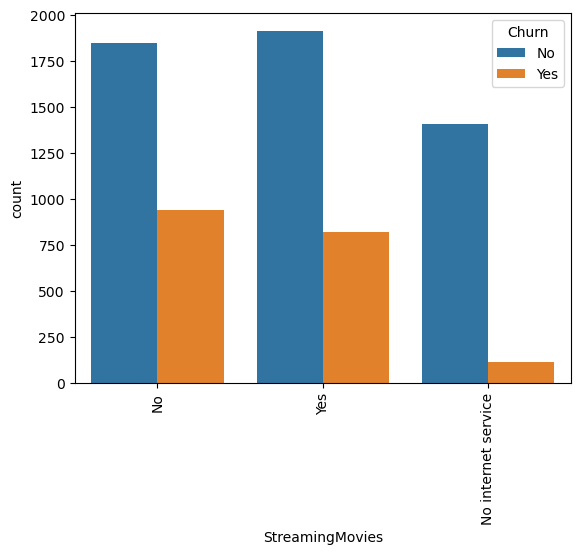

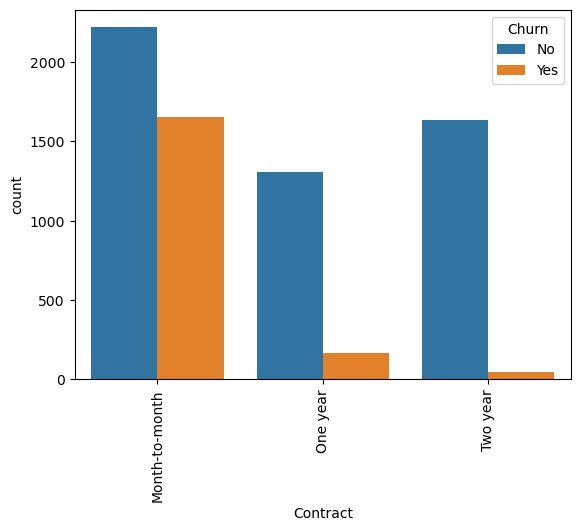

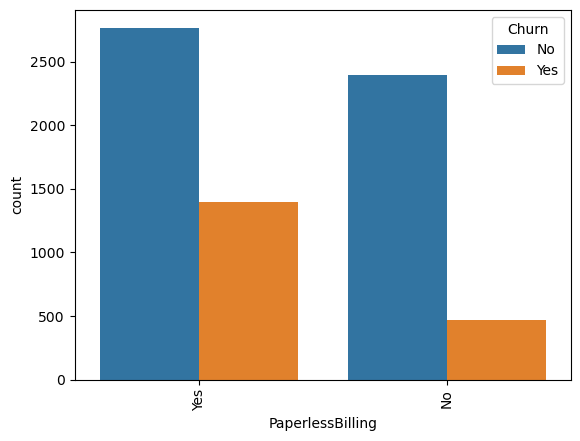

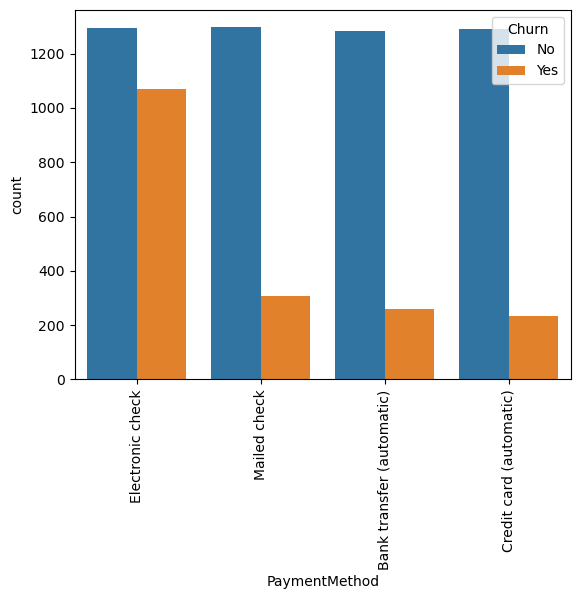

In [19]:
for col in churn.columns:
    if col not in excluded_variables:
        sns.countplot(data = churn, x= col,  hue='Churn')
        plt.xlabel(col)
        plt.xticks(rotation=90)
        plt.show()
        

## Checking Outliers

In [20]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

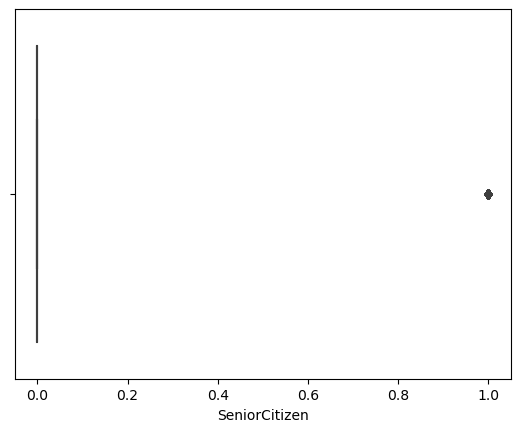

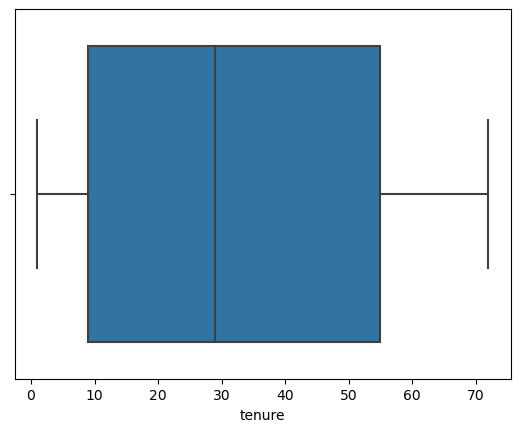

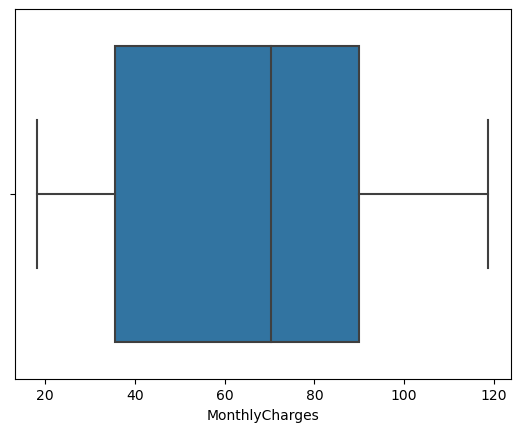

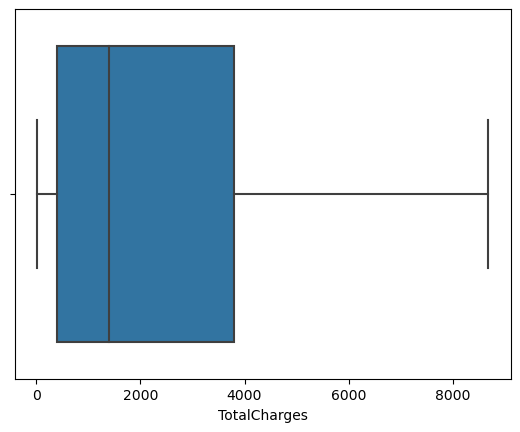

In [22]:
for col in churn.columns:
    if churn[col].dtype!= 'object':
        sns.boxplot(data = churn, x= col)
        plt.xlabel(col)
        plt.show()
        

In [23]:
churn['Churn'] = np.where(churn.Churn == 'Yes',1,0)

In [24]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [27]:
churn_data = pd.get_dummies(churn, drop_first=True).astype(int)


In [28]:
churn_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29,29,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56,1889,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53,108,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42,1840,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70,151,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [39]:
churn_data.dtypes

SeniorCitizen                            int32
tenure                                   int32
MonthlyCharges                           int32
TotalCharges                             int32
Churn                                    int32
gender_Male                              int32
Partner_Yes                              int32
Dependents_Yes                           int32
PhoneService_Yes                         int32
MultipleLines_No phone service           int32
MultipleLines_Yes                        int32
InternetService_Fiber optic              int32
InternetService_No                       int32
OnlineSecurity_No internet service       int32
OnlineSecurity_Yes                       int32
OnlineBackup_No internet service         int32
OnlineBackup_Yes                         int32
DeviceProtection_No internet service     int32
DeviceProtection_Yes                     int32
TechSupport_No internet service          int32
TechSupport_Yes                          int32
StreamingTV_N

In [29]:
churn_data.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [40]:
col_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

churn_data[col_to_scale]= scaler.fit_transform(churn_data[col_to_scale])

In [43]:
churn_data.sample(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
173,0,0.732394,0.76,0.574890,1,0,1,0,1,0,...,0,1,0,1,1,0,1,0,0,0
5119,0,0.056338,0.57,0.043965,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
5538,0,0.000000,0.63,0.007270,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0


In [45]:
for col in churn_data:
    print(f'{col}:{churn_data[col].unique()}')

SeniorCitizen:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
MonthlyCharges:[0.11 0.38 0.35 0.24 0.52 0.81 0.71 0.86 0.31 0.   0.82 0.85 0.87 0.95
 0.02 0.88 0.37 0.72 0.21 0.01 0.41 0.12 0.46 0.78 0.77 0.48 0.27 0.51
 0.56 0.79 0.

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

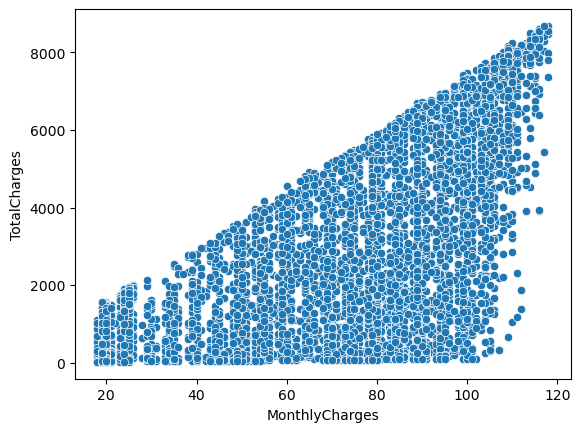

In [46]:
sns.scatterplot(data=churn_data_dummies, x='MonthlyCharges', y='TotalCharges')

In [46]:
x = churn_data.drop('Churn' , axis = 1)

In [47]:
x.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.000000,0.11,0.001269,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0.464789,0.38,0.215901,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0.014085,0.35,0.010385,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0.619718,0.24,0.210247,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0.014085,0.52,0.015347,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [48]:
y = churn_data['Churn']

In [49]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [91]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

## Model Building

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train,y_test = train_test_split(x,y, train_size= 0.75, random_state=100)

In [52]:
x_train.shape

(5274, 30)

In [54]:
x_test.shape

(1758, 30)

## Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
lo_model = LogisticRegression()

In [57]:
lo_model.fit(x_train, y_train)

LogisticRegression()

In [58]:
y_pred_lo = lo_model.predict(x_test)

In [59]:
y_pred_lo

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(y_test, y_pred_lo)

0.7940841865756542

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred_lo))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1268
           1       0.65      0.56      0.60       490

    accuracy                           0.79      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.79      0.79      0.79      1758



Text(95.72222222222221, 0.5, 'Actual')

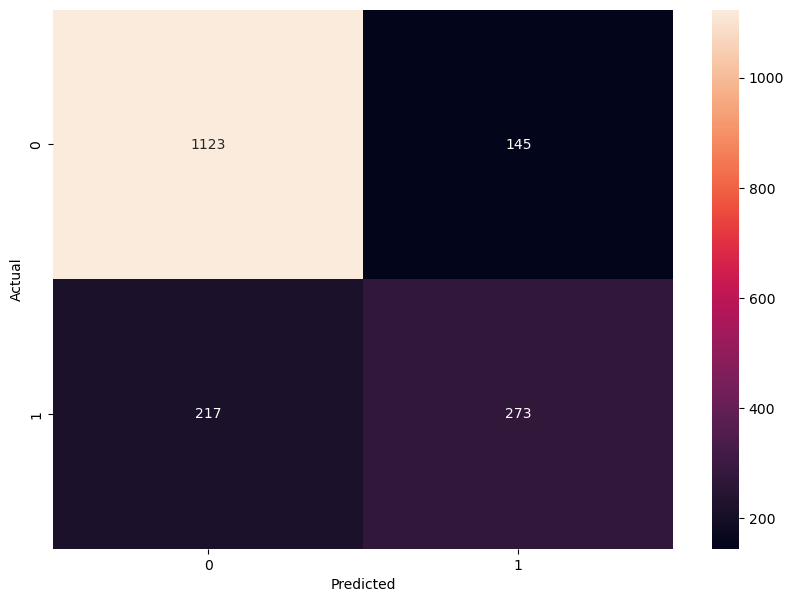

In [67]:
import seaborn as sn
cm = confusion_matrix(y_test, y_pred_lo)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Accuracy

In [68]:
(1123+273)/(1123+145+217+273)

0.7940841865756542

## Precision for 0 class (person who did not churn)

In [70]:
round(1123/(1123+217),2)

0.84

## Precision for 1 class (person who did churn)

In [72]:
round(273/(145+273),2)

0.65

## Recall for 0 class

In [73]:
round(1123/(1123+145),2)

0.89

## Recall for 1 class

In [74]:
round(273/(273+217),2)

0.56